In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mushroom=pd.read_csv("mushroom_cleaned.csv")
mushroom.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


## ROC:

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def evaluate_roc(model,xtest,ytest):
    ypreds=model.predict_proba(xtest)
    ypreds
    ypreds_pos=ypreds[:,1]
    ypreds_pos
    fpr,tpr,thresholds=roc_curve(ytest,ypreds_pos)
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='blue',linestyle='--',label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    print(f"Area under ROC curve: {roc_auc_score(ytest,ypreds_pos)}") # area under the curve when the base line is removed

## ConfusinMatrix:

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay
def evaluate_conmatrix(model,x,y,xtest,ytest):
    ypreds=model.predict(xtest)
    ConfusionMatrixDisplay.from_estimator(estimator=model,X=x,y=y)
    ConfusionMatrixDisplay.from_predictions(y_true=ytest,y_pred=ypreds)

## Cross Validation Score:

In [5]:
from sklearn.model_selection import cross_val_score
def evaluate_crossval(model,x,y):
    cvs=cross_val_score(model,x,y,cv=5)
    print("CrossValScore:",cvs)
    print(f"CrossValScore Mean:{np.mean(cvs)}")

## Calculating weights

In [55]:
def importance(model):
    lists=model.feature_importances_
    per=model.feature_importances_*100
    imp=pd.DataFrame({'Importance':lists,'Percentage':per},
                 index=x1.columns)
    imp=imp.sort_values(by='Importance',ascending=False)
    return imp

In [6]:
len(mushroom)

54035

In [7]:
mush1=mushroom[:10000]
mush2=mushroom[10000:20000]
mush3=mushroom[20000:30000]
mush4=mushroom[30000:40000]
mush5=mushroom[40000:50000]

In [8]:
len(mush1),len(mush2), len(mush3), len(mush4), len(mush5)

(10000, 10000, 10000, 10000, 10000)

## 1.RandomForestClassifier:

In [9]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x1=mush1.drop('class',axis=1)
y1=mush1['class']

xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2)

model1=RandomForestClassifier()
model1.fit(xtrain1,ytrain1)

RandomForestClassifier()

### 1.1 Score:

In [10]:
model1.score(xtest1,ytest1)

0.9875

### 1.2 ROC:

Area under ROC curve: 0.9989994103578796


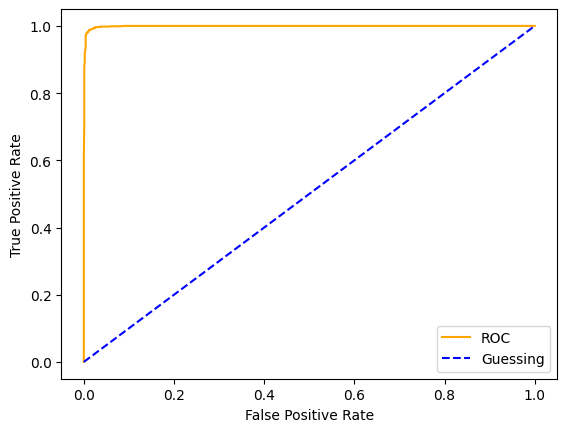

In [11]:
 evaluate_roc(model1,xtest1,ytest1)

### 1.3 ConfusinMatrix:

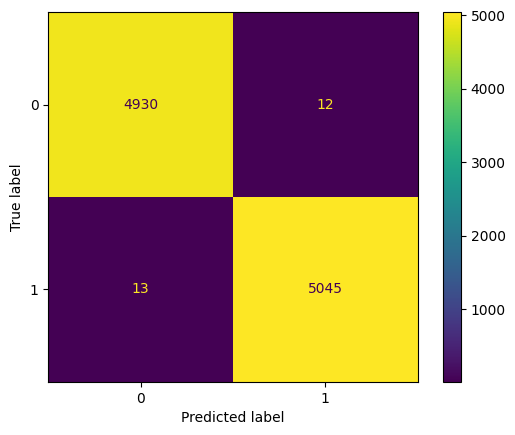

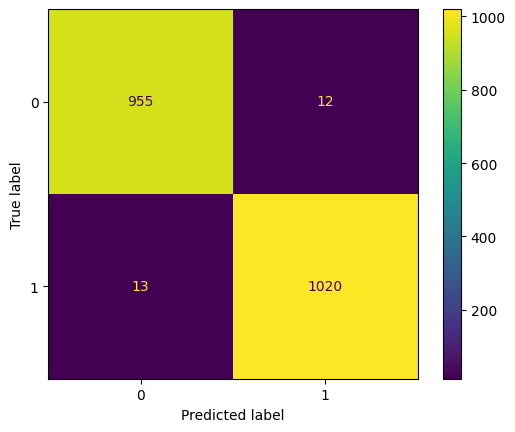

In [12]:
evaluate_conmatrix(model1,x1,y1,xtest1,ytest1)

### 1.4 Cross Validation Score:

In [13]:
evaluate_crossval(model1,x1,y1)

CrossValScore: [0.5715 0.3905 0.5595 0.6425 0.4925]
CrossValScore Mean:0.5313000000000001


### 1.5 calculation of weight of parameters

In [72]:
imp1=importance(model1)
imp1

,Importance,Percentage
stem-width,0.267355,26.735488
stem-height,0.168578,16.857784
cap-diameter,0.158550,15.854978
gill-attachment,0.108106,10.810577
cap-shape,0.100280,10.027982
stem-color,0.087320,8.731974
gill-color,0.084765,8.476500
season,0.025047,2.504718


# 2.KNeighborsClassifier:

In [14]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

x2=mush2.drop('class',axis=1)
y2=mush2['class']

xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.2)

model2=KNeighborsClassifier()
model2.fit(xtrain2,ytrain2)

KNeighborsClassifier()

### 2.1 Score:

In [15]:
model2.score(xtest2,ytest2)

0.8395

### 2.2 ROC:

Area under ROC curve: 0.9189443039914196


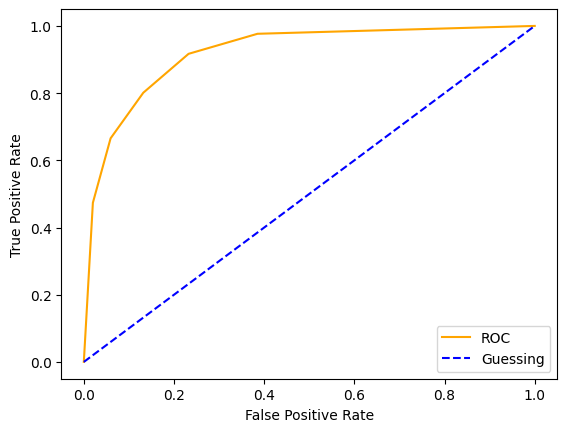

In [16]:
 evaluate_roc(model2,xtest2,ytest2)

### 2.3 ConfusinMatrix:

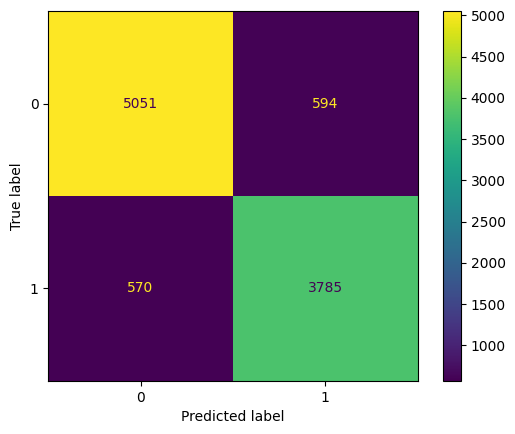

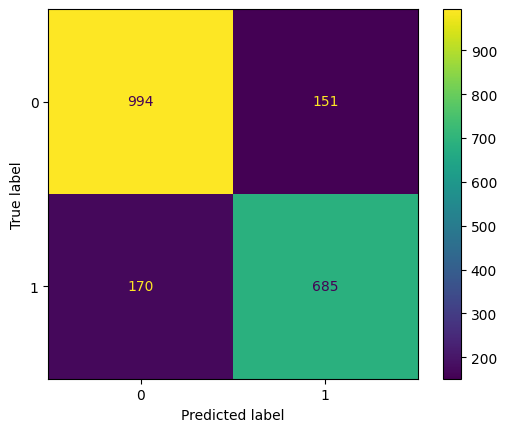

In [17]:
evaluate_conmatrix(model2,x2,y2,xtest2,ytest2)

### 2.4 Cross Validation Score:

In [18]:
evaluate_crossval(model2,x2,y2)

CrossValScore: [0.3305 0.4285 0.6145 0.702  0.449 ]
CrossValScore Mean:0.5048999999999999


### 2.5 calculation of weight of parameters

In [71]:
from sklearn.inspection import permutation_importance
res=permutation_importance(model2,x2,y2)
imp2=pd.DataFrame({"Importance":res.importances_mean,"Percentage":res.importances_mean*100},index=x2.columns)
imp2=imp2.sort_values(by='Importance',ascending=False)
imp2

,Importance,Percentage
stem-width,0.32884,32.884
cap-diameter,0.32862,32.862
stem-color,0.01730,1.730
gill-color,0.01234,1.234
gill-attachment,0.00714,0.714
cap-shape,0.00338,0.338
stem-height,0.00024,0.024
season,0.00002,0.002


# 3. GradientBoostingClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

x3=mush3.drop('class',axis=1)
y3=mush3['class']

xtrain3,xtest3,ytrain3,ytest3=train_test_split(x3,y3,test_size=0.2)

model3=GradientBoostingClassifier()
model3.fit(xtrain3,ytrain3)

GradientBoostingClassifier()

### 3.1 Score:

In [20]:
model3.score(xtest3,ytest3)

0.964

### 3.2 ROC:

Area under ROC curve: 0.9950786319146595


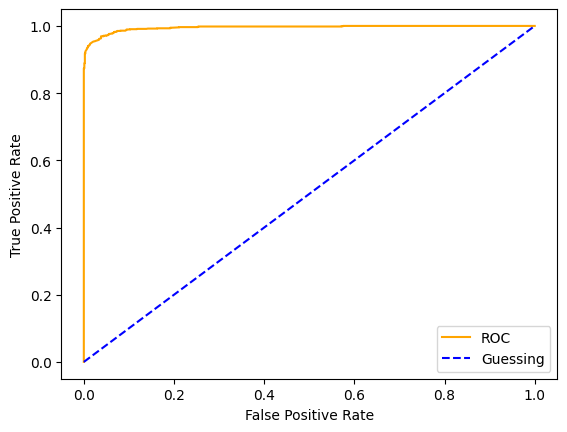

In [21]:
 evaluate_roc(model3,xtest3,ytest3)

### 3.3 Confusion Matrix:

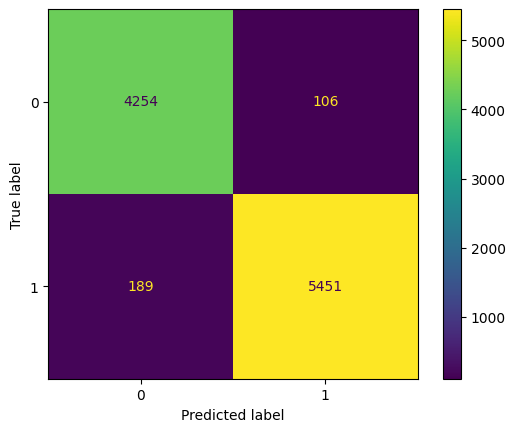

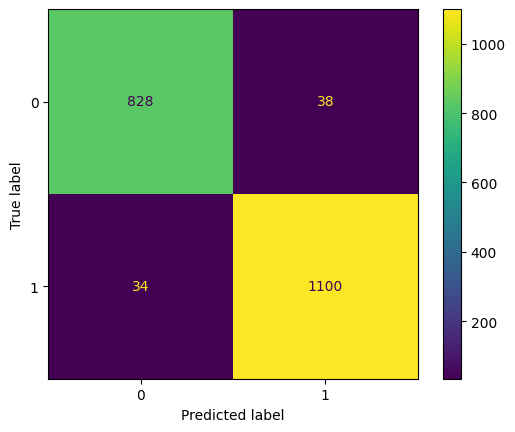

In [22]:
evaluate_conmatrix(model3,x3,y3,xtest3,ytest3)

### 3.4 Cross Validation Score

In [23]:
evaluate_crossval(model3,x3,y3)

CrossValScore: [0.539  0.7115 0.849  0.749  0.464 ]
CrossValScore Mean:0.6625


### 3.5 calculation of weight of parameters

In [73]:
imp3=importance(model3)
imp3

,Importance,Percentage
stem-width,0.335839,33.583897
stem-color,0.204349,20.434852
cap-diameter,0.128894,12.889360
gill-attachment,0.113808,11.380785
gill-color,0.100479,10.047928
cap-shape,0.067835,6.783480
season,0.040413,4.041289
stem-height,0.008384,0.838409


# 4. GaussianNB

In [24]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

x4=mush5.drop('class',axis=1)
y4=mush5['class']

xtrain4,xtest4,ytrain4,ytest4=train_test_split(x4,y4,test_size=0.2)

model4=GradientBoostingClassifier()
model4.fit(xtrain4,ytrain4)

GradientBoostingClassifier()

### 4.1 Score:

In [25]:
model4.score(xtest4,ytest4)

0.9965

### 4.2 ROC:

Area under ROC curve: 0.999920273741187


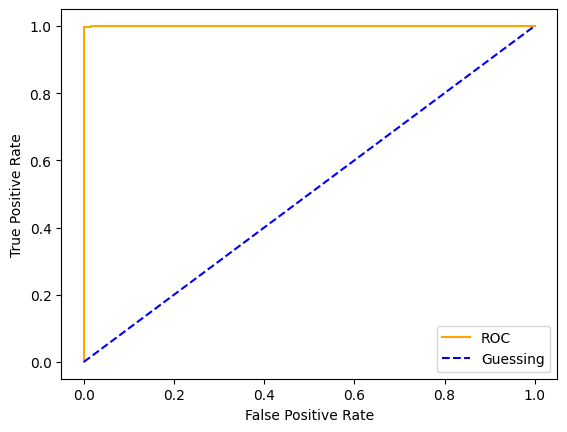

In [26]:
 evaluate_roc(model4,xtest4,ytest4)

### 4.3 ConfusionMatrix:

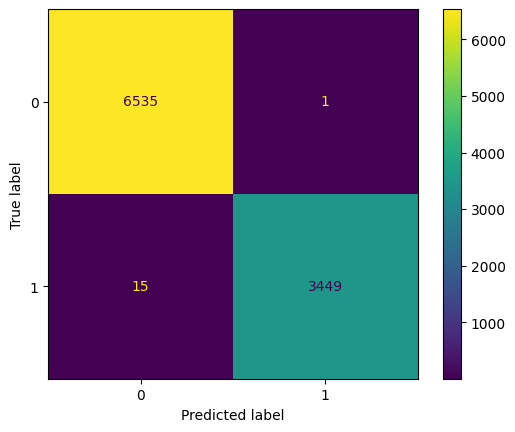

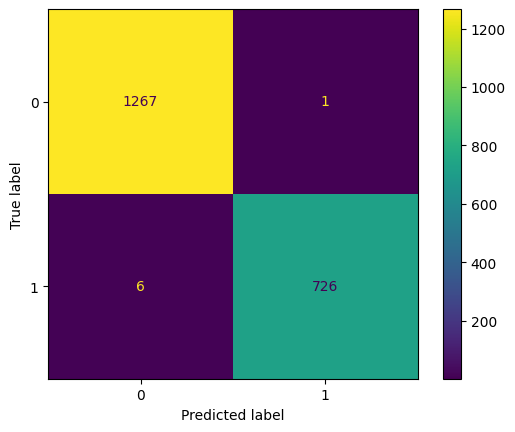

In [27]:
evaluate_conmatrix(model4,x4,y4,xtest4,ytest4)

### 4.4 Cross validation Score:

In [28]:
evaluate_crossval(model4,x4,y4)

CrossValScore: [0.6305 0.664  0.854  0.875  0.6905]
CrossValScore Mean:0.7428


Conclusion : ensemble model works better than other classifirers

### 4.5 calculation of weight of parameters

In [74]:
imp4=importance(model4)
imp4

,Importance,Percentage
stem-width,0.311914,31.191406
stem-color,0.250017,25.001682
gill-attachment,0.194729,19.472912
cap-shape,0.077025,7.702534
gill-color,0.068321,6.832054
stem-height,0.064093,6.409294
cap-diameter,0.033724,3.372391
season,0.000177,0.017727


## Aggregating feature weights

In [89]:
imp=(imp1+imp2+imp3+imp4)/4
imp.sort_values(by='Importance',ascending=False)

,Importance,Percentage
stem-width,0.310987,31.098698
cap-diameter,0.162447,16.244682
stem-color,0.139746,13.974627
gill-attachment,0.105946,10.594568
gill-color,0.066476,6.647620
cap-shape,0.062130,6.212999
stem-height,0.060324,6.032372
season,0.016414,1.641434
